In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_style("whitegrid")


from valcode.manchester import ManchesterLineData
from valcode.mydata import *

# Line Data

In [2]:
# Get data for each loc
x_locs = [-7, -4.5, -2, 1, 2]
x_locs = [-7, -4.5, -2, -0.5, 1, 2]
les_line_folder = r'E:\LES_Manchester\UoM_TJ_LES-20211013T183109Z-001\UoM_TJ_LES\lines'
struct_line_folder = r'E:\project1_Manchester\CFD_Manchester\1_FullModel\Struct\1p5mm_v2_ManchesterInlet\Lines'
cubic_folder = r'E:\project1_Manchester\CFD_Manchester\1_FullModel\Cubic'

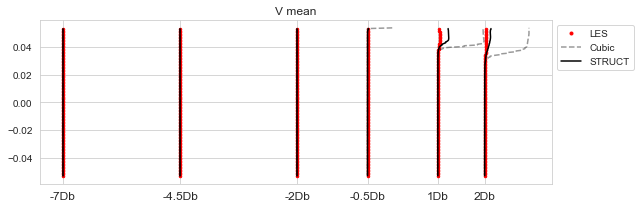

In [4]:
# Some Parameter
scaling_fac = 1
title = 'V mean'
# title = 'TKE'
fname = Path(r"data/figures/V_mean.png")
save = False

# Define the data in this block
def select_data(data_obj):
    # coord = data_obj.vertical.tke.coord
    # value = data_obj.vertical.tke.tke

    coord = data_obj.vertical.Tmean.coord
    value = data_obj.vertical.Tmean.T

    # coord = data_obj.vertical.Umean.coord
    # value = data_obj.vertical.Umean.V
    # sort
    x = sorted(coord)[1:]
    y = value[coord.argsort()[1:]]

    # normalize
    min_value = value[~np.isnan(value)].min()
    max_value = value[~np.isnan(value)].max()
    y = y-min_value
    # y = (y-min_value)/(max_value - min_value)


    return x, y


fig, ax =  plt.subplots(1,1, figsize=(9, 3))
for loc in x_locs:
    # Initiate data
    mscs = ManchesterLineData(les_line_folder, loc=loc)
    struct = MyLineData(struct_line_folder, loc, f_read_Umean=read_struct_Umean, f_read_tke=read_struct_tke, f_read_Tmean=read_struct_Tmean)
    cubic = MyLineData(cubic_folder, loc, read_cubic_Umean, read_cubic_tke, read_cubic_Tmean)


    # Umean 
    mscs_coord, mscs_Umean = select_data(mscs)
    struct_coord, struct_Umean = select_data(struct)
    cubic_coord, cubic_Umean = select_data(cubic)

    # ax.plot(mscs_Umean[::20]+ loc*scaling_fac, mscs_coord[::20], 'r.',markersize=5, label='les')
    # ax.plot(mscs_Umean[:5:]+ loc*scaling_fac, mscs_coord[:5:], 'r.',markersize=5, label='les')
    ax.plot(mscs_Umean[::1]+ loc*scaling_fac, mscs_coord[::1], 'r.',markersize=5, label='les')
    ax.plot(struct_Umean+ loc*scaling_fac, struct_coord, 'k', label='struct')
    ax.plot(cubic_Umean+ loc*scaling_fac, cubic_coord, 'k--', alpha=0.4, label='struct')
    # plt.legend()

ax.set_xticks(np.array(x_locs) * scaling_fac)
ax.set_xticklabels(['%sDb' % x for x in x_locs], fontsize=12)
# ax.grid()
legend_elements = [
    Line2D([0], [0], color='r', marker='.', linestyle='', label="LES"),
    Line2D([0], [0], color='k', alpha=0.4, linestyle='--', label="Cubic"),
    Line2D([0], [0], color='k', linestyle='-', label="STRUCT"),
    ]
plt.legend(handles=legend_elements, bbox_to_anchor=(1., 1))
plt.title(title)
plt.tight_layout()

if save:
    plt.savefig(fname)